In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder
from sklearn.metrics import auc, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
# import xgboost as xgb


In [2]:
names = ["LogisticRegression","Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "Gradient Boosting Classifer", "XGBoost"]

classifiers = [
        LogisticRegression(),
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1,max_iter=500),
        AdaBoostClassifier(),
        GaussianNB(),
        GradientBoostingClassifier(max_depth=5)]

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [11]:
for i in train.columns:
    print(train[i].value_counts())



2047     1
6758     1
14978    1
8833     1
10880    1
4727     1
6774     1
629      1
2676     1
12915    1
14962    1
8817     1
10864    1
4711     1
613      1
2692     1
2660     1
12899    1
14946    1
8801     1
10848    1
4695     1
6742     1
597      1
2644     1
12883    1
14930    1
8785     1
12931    1
645      1
        ..
3355     1
13596    1
9502     1
11551    1
3419     1
1370     1
7513     1
5464     1
11599    1
9550     1
13644    1
3403     1
1354     1
7497     1
5448     1
11583    1
9534     1
13628    1
3387     1
1338     1
7481     1
5432     1
11567    1
9518     1
13612    1
3371     1
1322     1
7465     1
5416     1
2049     1
Name: Id, Length: 15120, dtype: int64
2290    25
2830    25
3371    24
3244    23
2820    23
2955    23
2795    23
2952    23
2962    22
2304    22
2809    22
2978    22
2413    22
2707    22
2850    22
2763    22
2289    21
2739    21
2827    21
2784    21
2807    21
2328    21
2311    20
3256    20
2751    20
2336    20
2340 

In [8]:
train.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.045635      0.040741      0.001455   
std        45.895189  ...      0.208699      0.197696      0.038118   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030357      4.000000  
std        0.171574      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

In [34]:
col = train.columns

In [74]:
sns.pairplot(train)
plt.show()

In [35]:
std_col = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [36]:
for i in std_col:
    train[i]= MinMaxScaler().fit_transform(train[i].values.reshape(-1,1))


C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda

In [31]:
train.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000      0.446285      0.435213      0.317338   
std     4364.91237      0.210311      0.305794      0.162576   
min        1.00000      0.000000      0.000000      0.000000   
25%     3780.75000      0.258308      0.180556      0.192308   
50%     7560.50000      0.447633      0.350000      0.288462   
75%    11340.25000      0.624874      0.725000      0.423077   
max    15120.00000      1.000000      1.000000      1.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                           0.169170                        0.281538   
std                            0.156422                        0.087485   
min                            0.000000                        0.000000   
25%                            0.049888                        0.215714   
50%                            0.134028                        0.254286   
75%                            0.245719                        0.321429   
max                            1.000000                        1.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                          0.248770       0.837418        0.773972   
std                           0.192317       0.120320        0.147109   
min                           0.000000       0.000000        0.000000   
25%                           0.110885       0.771654        0.696774   
50%                           0.191001       0.866142        0.800000   
75%                           0.329463       0.925197        0.877419   
max                           1.000000       1.000000        1.000000   

       Hillshade_3pm  ...   Soil_Type31   Soil_Type32   Soil_Type33  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean        0.544726  ...      0.021958      0.045635      0.040741   
std         0.185061  ...      0.146550      0.208699      0.197696   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%         0.427419  ...      0.000000      0.000000      0.000000   
50%         0.556452  ...      0.000000      0.000000      0.000000   
75%         0.673387  ...      0.000000      0.000000      0.000000   
max         1.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.001455      0.006746      0.000661      0.002249      0.048148   
std        0.038118      0.081859      0.025710      0.047368      0.214086   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type39   Soil_Type40  
count  15120.000000  15120.000000  
mean       0.043452      0.030357  
std        0.203880      0.171574  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 55 columns]

In [49]:
y_train = train['Cover_Type']

KeyError: 'Cover_Type'

In [50]:
y = y_train.copy()

In [38]:
train = train.drop('Cover_Type', axis=1)

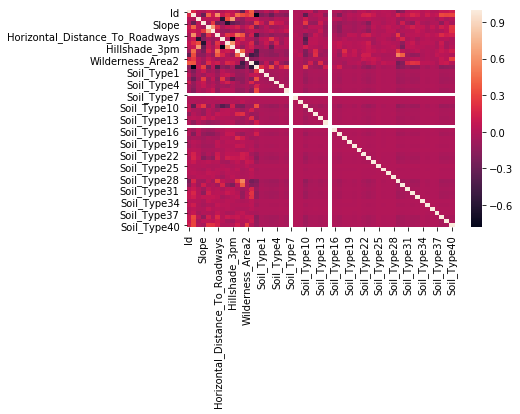

In [39]:
corr = train.corr()
sns.heatmap(corr)
plt.show()

In [24]:
train.Soil_Type7.value_counts()

0    15120
Name: Soil_Type7, dtype: int64

In [26]:
train['Soil_Type15'].value_counts()

0    15120
Name: Soil_Type15, dtype: int64

In [64]:
train= train.drop('Id', axis=1)

In [65]:
train.head()

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.369084  0.141667  0.057692                          0.192107   
1   0.366062  0.155556  0.038462                          0.157856   
2   0.473817  0.386111  0.173077                          0.199553   
3   0.464250  0.430556  0.346154                          0.180194   
4   0.368580  0.125000  0.038462                          0.113924   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.208571                         0.074020   
1                        0.200000                         0.056604   
2                        0.301429                         0.461538   
3                        0.377143                         0.448476   
4                        0.207143                         0.056749   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.870079        0.858065       0.596774   
1       0.866142        0.877419       0.608871   
2       0.921260        0.896774       0.544355   
3       0.937008        0.896774       0.491935   
4       0.866142        0.870968       0.604839   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type31  Soil_Type32  \
0                            0.897898  ...            0            0   
1                            0.890176  ...            0            0   
2                            0.875304  ...            0            0   
3                            0.888174  ...            0            0   
4                            0.882597  ...            0            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 54 columns]

In [51]:
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=42)

In [67]:
cross_val_score(rfc, train, y)

C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.74503968, 0.7359127 , 0.73948413])

In [61]:
train.head()

Id  Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0  0.369084   0.369084  0.141667  0.057692                          0.192107   
1  0.366062   0.366062  0.155556  0.038462                          0.157856   
2  0.473817   0.473817  0.386111  0.173077                          0.199553   
3  0.464250   0.464250  0.430556  0.346154                          0.180194   
4  0.368580   0.368580  0.125000  0.038462                          0.113924   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.208571                         0.074020   
1                        0.200000                         0.056604   
2                        0.301429                         0.461538   
3                        0.377143                         0.448476   
4                        0.207143                         0.056749   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type31  \
0       0.870079        0.858065       0.596774  ...            0   
1       0.866142        0.877419       0.608871  ...            0   
2       0.921260        0.896774       0.544355  ...            0   
3       0.937008        0.896774       0.491935  ...            0   
4       0.866142        0.870968       0.604839  ...            0   

   Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0            0  
1            0            0            0            0  
2            0            0            0            0  
3            0            0            0            0  
4            0            0            0            0  

[5 rows x 55 columns]

In [68]:
rfc.fit(train, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
for i in std_col:
    test[i]= MinMaxScaler().fit_transform(test[i].values.reshape(-1,1))

C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda

In [58]:
test.head()
test_id = test['Id']
test = test.drop('Id', axis =1)

In [59]:
test.head()

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.410705  0.983333  0.212121                               0.0   
1   0.412206  0.000000  0.196970                               0.0   
2   0.427214  0.044444  0.227273                               0.0   
3   0.425213  0.066667  0.257576                               0.0   
4   0.423712  0.080556  0.287879                               0.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.223514                         0.377125   
1                        0.223514                         0.372910   
2                        0.223514                         0.418716   
3                        0.223514                         0.414500   
4                        0.223514                         0.410285   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.771654        0.842520       0.614173   
1       0.791339        0.850394       0.598425   
2       0.811024        0.818898       0.539370   
3       0.818898        0.791339       0.492126   
4       0.826772        0.767717       0.452756   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type31  Soil_Type32  \
0                            0.926391  ...            0            0   
1                            0.930573  ...            0            0   
2                            0.884428  ...            0            0   
3                            0.888610  ...            0            0   
4                            0.892792  ...            0            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 54 columns]

In [85]:
def cv_score(X_train, y_train, X_val, y_val):
#     obj_features, num_features = feature_list(df)
    names = ["LogisticRegression","Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "Gradient Boosting Classifer"]

    classifiers = [
        LogisticRegression(),
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1,max_iter=500),
        AdaBoostClassifier(),
        GaussianNB(),
        GradientBoostingClassifier(max_depth=5)]
    print("==========================")
    print("Cross Validation")
    print("==========================")

    for name, clf in zip(names, classifiers):
        cv_score = cross_val_score(clf, X_train, y_train,cv=5).mean()
        print(f'{name}: {cv_score}')

    print()
    print("====================")
    print()

    print("==========================")
    print("ROC_AUC_SCORE using validation set")
    print("==========================")
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        roc_score = roc_auc_score(y_val, y_pred)
        print(f'{name}: {roc_score}')

In [ ]:
cv_score(X_train, y_train, X_val, y_val)

Cross Validation


C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Use

LogisticRegression: 0.6656651199197444
Nearest Neighbors: 0.7947267168071555
Linear SVM: 0.6089639695533664


In [69]:
prediction = rfc.predict(test)

In [73]:
result = pd.DataFrame({'Id': test_id,
                       'Cover_Type': prediction})
result.to_csv('./submission.csv', index=False,line_terminator='\n')

In [71]:
result.head(100)

ID  TARGET
0   15121       1
1   15122       2
2   15123       2
3   15124       2
4   15125       2
5   15126       2
6   15127       2
7   15128       2
8   15129       2
9   15130       2
10  15131       2
11  15132       2
12  15133       2
13  15134       1
14  15135       1
15  15136       2
16  15137       2
17  15138       1
18  15139       2
19  15140       2
20  15141       2
21  15142       2
22  15143       2
23  15144       2
24  15145       2
25  15146       2
26  15147       2
27  15148       2
28  15149       2
29  15150       2
..    ...     ...
70  15191       2
71  15192       1
72  15193       1
73  15194       2
74  15195       2
75  15196       2
76  15197       2
77  15198       2
78  15199       2
79  15200       2
80  15201       2
81  15202       2
82  15203       2
83  15204       5
84  15205       5
85  15206       2
86  15207       2
87  15208       2
88  15209       2
89  15210       1
90  15211       2
91  15212       2
92  15213       2
93  15214       2
94  15215       2
95  15216       2
96  15217       2
97  15218       2
98  15219       2
99  15220       2

[100 rows x 2 columns]